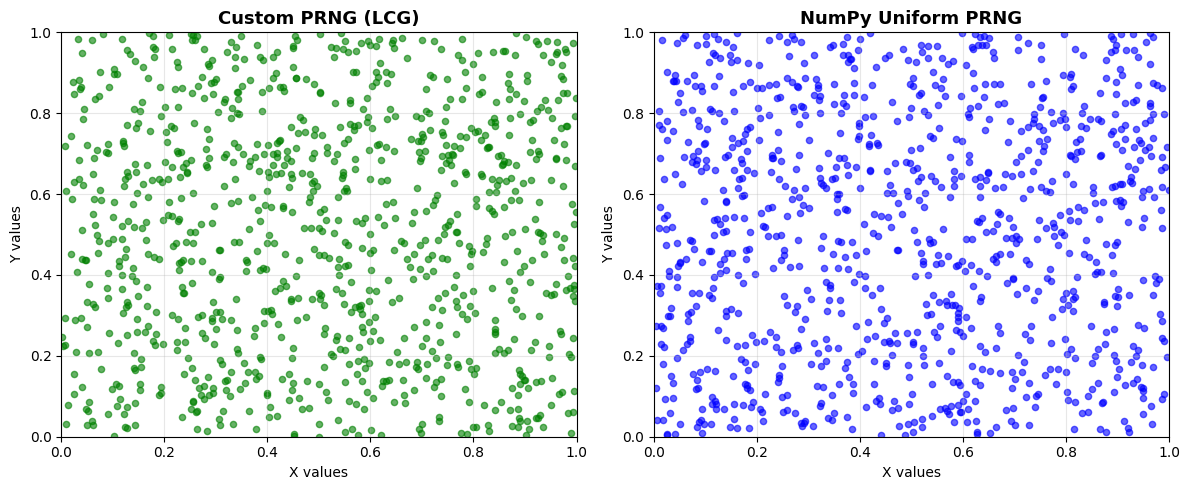

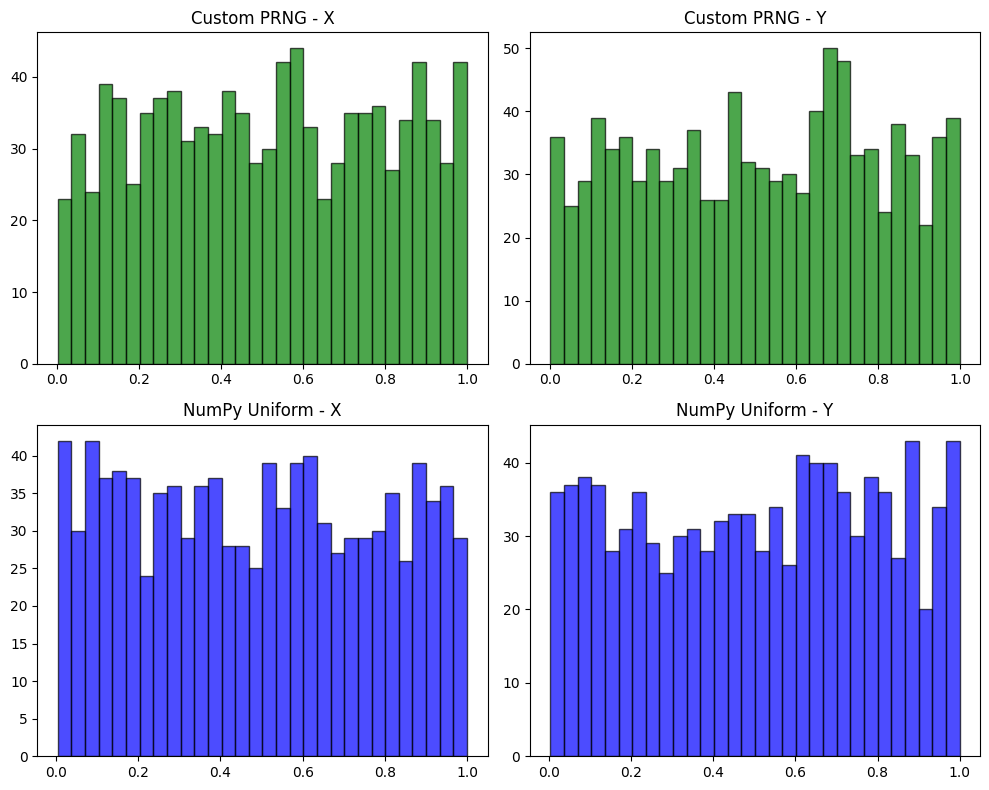

=== PRNG Comparison ===
Custom PRNG - Mean X: 0.511, Std X: 0.285
Custom PRNG - Mean Y: 0.507, Std Y: 0.288
NumPy PRNG  - Mean X: 0.490, Std X: 0.292
NumPy PRNG  - Mean Y: 0.507, Std Y: 0.292


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Custom PRNG using Linear Congruential Generator (LCG)
class CustomPRNG:
    def __init__(self, seed=12345, a=1664525, c=1013904223, m=2**32):
        self.state = seed
        self.a = a
        self.c = c
        self.m = m

    def next(self):
        self.state = (self.a * self.state + self.c) % self.m
        return self.state / self.m  # Output normalized to [0,1)

    def generate(self, n):
        return [self.next() for _ in range(n)]

# Scatter plot function
def plot_scatter(ax, x, y, title, color):
    ax.scatter(x, y, alpha=0.6, s=20, color=color)
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_xlabel('X values')
    ax.set_ylabel('Y values')
    ax.grid(True, alpha=0.3)

# Histogram plot function
def plot_histogram(ax, data, title, color):
    ax.hist(data, bins=30, alpha=0.7, color=color, edgecolor='black')
    ax.set_title(title)

# Set number of points
n = 1000

# Generate points using Custom PRNG
custom_rng = CustomPRNG(seed=42)
x_custom = custom_rng.generate(n)
y_custom = custom_rng.generate(n)

# Generate points using NumPy PRNG
np.random.seed(42)
x_np = np.random.rand(n)
y_np = np.random.rand(n)

# Scatter plots comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plot_scatter(ax1, x_custom, y_custom, 'Custom PRNG (LCG)', 'green')
plot_scatter(ax2, x_np, y_np, 'NumPy Uniform PRNG', 'blue')
plt.tight_layout()
plt.savefig('custom_vs_numpy_prng.pdf')
plt.show()

# Histogram plots comparison
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
plot_histogram(axs[0][0], x_custom, 'Custom PRNG - X', 'green')
plot_histogram(axs[0][1], y_custom, 'Custom PRNG - Y', 'green')
plot_histogram(axs[1][0], x_np, 'NumPy Uniform - X', 'blue')
plot_histogram(axs[1][1], y_np, 'NumPy Uniform - Y', 'blue')
plt.tight_layout()
plt.savefig('custom_prng_histograms.pdf')
plt.show()

# Summary Statistics
print("=== PRNG Comparison ===")
print(f"Custom PRNG - Mean X: {np.mean(x_custom):.3f}, Std X: {np.std(x_custom):.3f}")
print(f"Custom PRNG - Mean Y: {np.mean(y_custom):.3f}, Std Y: {np.std(y_custom):.3f}")
print(f"NumPy PRNG  - Mean X: {np.mean(x_np):.3f}, Std X: {np.std(x_np):.3f}")
print(f"NumPy PRNG  - Mean Y: {np.mean(y_np):.3f}, Std Y: {np.std(y_np):.3f}")
